In [1]:
import pandas as pd
import numpy
import sklearn
import scipy
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
from math import radians, cos, sin, asin, sqrt 
from scipy.cluster.vq import whiten
from scipy.cluster.vq import *  
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def haversine(lonlat1, lonlat2):
    lat1, lon1 = lonlat1
    lat2, lon2 = lonlat2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [3]:
fr3 = open('/data/locus/data_feature_1_2_2.csv','r') 
latitude = []
longitude = []
for line in fr3.readlines():
    item = [k.strip() for k in line.split(',')]
    latitude.append(float(item[1]))
    longitude.append(float(item[2]))

In [ ]:
 '''
 X = pd.DataFrame(
        {"lat": [39.920767, 39.920965, 39.92304, 39.989539, 39.92069, 39.920845, 39.920902, 39.920657, 39.920934,
                 39.920691, 39.920671, 39.920864, 39.920856, 39.920407, 39.920867, 39.920425, 39.920377, 39.920442,
                 39.920474, 39.920636, 39.921168, 39.920006, 39.920612, 39.919584, 39.920737, 39.920641, 39.920574,
                 39.920841, 39.920644, 39.920847, 39.922041, 39.92088, 39.920603, 39.920851, 39.920789, 39.92082,
                 39.920564, 39.920771, 39.920868, 39.920544, 39.920758, 39.926767, 39.92024, 39.917848, 40.00875,
                 39.980757, 39.9808, 40.009217, 39.920747, 39.919515, 39.920533, 39.991104, 39.917724, 39.924316,
                 39.920642, 39.924413, 39.920828, 39.991098, 39.991139, 31.97337, 31.97392, 31.973121, 31.973254,
                 31.973807, 31.973692, 31.973439, 31.973489, 39.926799, 39.917804, 39.920645, 39.920441, 39.920043,
                 39.920826, 39.920791, 39.920896, 39.920811, 39.920621, 39.9259, 39.886322, 39.92062],
         "lng": [116.455788, 116.456065, 116.452312, 116.421385, 116.455685, 116.455876, 116.455973, 116.455645,
                 116.456022, 116.455685, 116.456023, 116.45596, 116.455522, 116.455276, 116.455799, 116.455349,
                 116.45511, 116.455318, 116.455298, 116.455839, 116.455979, 116.454281, 116.45598, 116.45388,
                 116.455474, 116.456009, 116.455439, 116.455759, 116.455838, 116.455983, 116.459803, 116.456029,
                 116.455539, 116.455989, 116.455719, 116.45601, 116.456229, 116.455906, 116.456248, 116.455805,
                 116.455896, 116.43692, 116.454672, 116.454813, 116.381415, 116.422925, 116.422849, 116.38107,
                 116.456078, 116.455242, 116.455615, 116.422092, 116.454847, 116.456686, 116.45575, 116.456713,
                 116.455846, 116.422108, 116.422075, 118.775572, 118.776968, 118.778187, 118.775695, 118.775302,
                 118.776303, 118.777541, 118.776196, 116.448944, 116.45487, 116.455762, 116.456146, 116.455857,
                 116.455458, 116.455533, 116.455426, 116.45566, 116.455696, 116.453667, 116.466606, 116.455917]
         })
 '''
lati = latitude[1000:4000]
longi = longitude[1000:4000]
X = pd.DataFrame ({"lat":lati,"lng":longi})
distance_matrix = squareform(pdist(X, (lambda u, v: haversine(u, v))))
db = DBSCAN(eps=3, min_samples=20, metric='precomputed')  
y_db = db.fit_predict(distance_matrix)

X['cluster'] = y_db

results = {}
for i in X.values:
    if i[2] not in results.keys():
         results[i[2]] = [[i[1], i[0]]]
    else:
        if results[i[2]]:
            results[i[2]].append([i[1], i[0]])
        else:
            results[i[2]] = [[i[1], i[0]]]
print ("DBSCAN output:", len(results), results.keys())
print ("KMeans calc center as below: ")
for k in results.keys():
    xy = numpy.array(results[k])
    z = numpy.sin(xy[:, 1] - 0.2 * xy[:, 1])

    z = whiten(z)

    res, idx = kmeans2(numpy.array(list(zip(xy[:, 0], xy[:, 1], z))),1, iter=20, minit='points')
    print (res)   

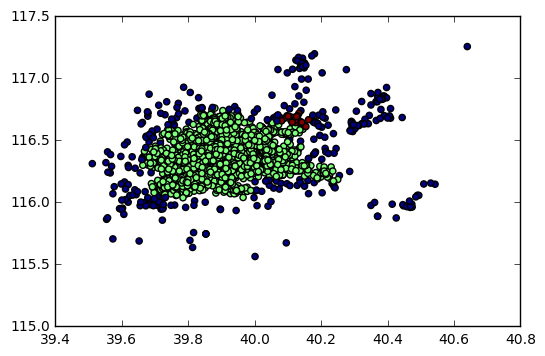

In [12]:
    fig, ax = plt.subplots()
    ax.scatter(X['lat'], X['lng'], c=X['cluster'])
    plt.show()

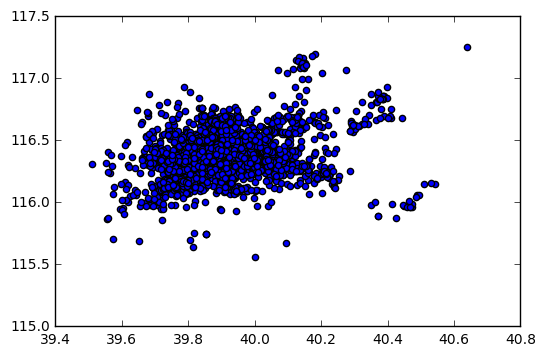

In [6]:
    fig, ax = plt.subplots()
    ax.scatter(X['lat'], X['lng'])
    plt.show()